<a href="https://colab.research.google.com/github/varunkr24/Natural-Language-Processing/blob/Python/NLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blog Authorship Corpus
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multilabel classification problem. Dataset Blog Authorship Corpus

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and age but for many, industry and/or sign is marked as unknown.)

All bloggers included in the corpus fall into one of three age groups: 8240 "10s" blogs (ages 13-17), 8086 "20s" blogs(ages 23-27) 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label urllink

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

STEPS:    
1.Import and analyse the data set.   
2.Perform data pre-processing on the data:   
•Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.   
•Target/label merger and transformation   
•Train and test split   
•Vectorisation, etc.   
3.Design, train, tune and test the best text classifier.   
4.Display and explain detail the classification report   
5.Print the true vs predicted labels for any 5 entries from the dataset.

In [2]:
import pandas as pd
import numpy as np 
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/durgaprasadk10/blog-authorship-corpus-solution

In [4]:
df = pd.read_csv('/content/drive/My Drive/AIML/Projects/blogtext.csv')

In [5]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
df.shape

(681284, 7)

In [7]:
df.sample(5)

,id,gender,age,topic,sign,date,text
573835,1878430,male,36,indUnk,Aquarius,"05,April,2004","Be warned, the link is not for the fain..."
658993,1337805,female,17,Student,Aquarius,"01,August,2004",yum! Saw Return of the King last night...
620460,239860,male,25,indUnk,Leo,"05,October,2001",urlLink You are Princess Leia *big laugh*...
477478,4300645,male,15,Education,Leo,"21,August,2004",I n the second round of the NEC...
670919,2303699,female,23,Science,Aquarius,"09,March,2004",I can't wait to have some bre...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [9]:
df.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [10]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

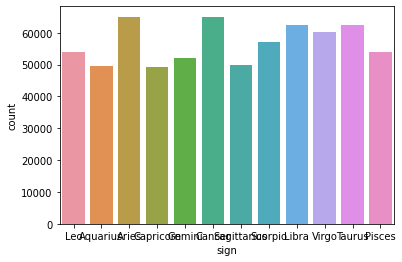

In [11]:
sns.countplot(x='sign',data=df)

As the dataset is large and it is unable run on machine so limiting the data and using fewer rows.

In [12]:
  df = df.sample(100000)

In [14]:
df.gender.value_counts()

male      50718
female    49282
Name: gender, dtype: int64

In [13]:
df.head(5)

,id,gender,age,topic,sign,date,text
284493,692449,male,24,Technology,Scorpio,"01,August,2004","SAN FRANCISCO, Bay Area - Political pri..."
208689,3389978,male,23,Engineering,Libra,"24,May,2004",I am ready for some changes i...
1957,589736,male,35,Technology,Aries,"05,August,2004",the new 'state-of-the-arf' shelter ...
39661,580228,male,17,Communications-Media,Libra,"20,April,2004",Kick and Scream Gucci Little Piggy! [...
84073,3306739,male,41,indUnk,Gemini,"27,July,2004",Now that S. is closer to bein...


**Preprocess rows of the “text” column**  
a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [15]:
pattern = "[^\w ]"
df.text = df.text.apply(lambda s : re.sub(pattern,"",s))

In [16]:
df.head()

,id,gender,age,topic,sign,date,text
284493,692449,male,24,Technology,Scorpio,"01,August,2004",SAN FRANCISCO Bay Area Political priso...
208689,3389978,male,23,Engineering,Libra,"24,May,2004",I am ready for some changes i...
1957,589736,male,35,Technology,Aries,"05,August,2004",the new stateofthearf shelter this...
39661,580228,male,17,Communications-Media,Libra,"20,April,2004",Kick and Scream Gucci Little Piggy Ra...
84073,3306739,male,41,indUnk,Gemini,"27,July,2004",Now that S is closer to being...


**Convert text to lower case**

In [17]:
df.text = df.text.apply(lambda s: s.lower())  

**Remove unwanted spaces**

In [18]:
df.text = df.text.apply(lambda s: s.strip())

**Remove stopwords**

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords= set(stopwords.words('english'))

In [21]:
df.text = df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [22]:
df.head()

,id,gender,age,topic,sign,date,text
284493,692449,male,24,Technology,Scorpio,"01,August,2004",san francisco bay area political prisoner urll...
208689,3389978,male,23,Engineering,Libra,"24,May,2004",ready changes life know god change mold let go...
1957,589736,male,35,Technology,Aries,"05,August,2004",new stateofthearf shelter makes proud richmond...
39661,580228,male,17,Communications-Media,Libra,"20,April,2004",kick scream gucci little piggy radioheadparano...
84073,3306739,male,41,indUnk,Gemini,"27,July,2004",closer 5 years old 4nbspshe partnbspget dresse...


**Drop id and date columns**

In [23]:
df.drop(labels=['id','date'], axis=1, inplace = True)

As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [24]:
df['labels'] = df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [25]:
df.head()


,gender,age,topic,sign,text,labels
284493,male,24,Technology,Scorpio,san francisco bay area political prisoner urll...,"[male, 24, Technology, Scorpio]"
208689,male,23,Engineering,Libra,ready changes life know god change mold let go...,"[male, 23, Engineering, Libra]"
1957,male,35,Technology,Aries,new stateofthearf shelter makes proud richmond...,"[male, 35, Technology, Aries]"
39661,male,17,Communications-Media,Libra,kick scream gucci little piggy radioheadparano...,"[male, 17, Communications-Media, Libra]"
84073,male,41,indUnk,Gemini,closer 5 years old 4nbspshe partnbspget dresse...,"[male, 41, indUnk, Gemini]"


In [26]:
df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [27]:
df.head()

,text,labels
284493,san francisco bay area political prisoner urll...,"[male, 24, Technology, Scorpio]"
208689,ready changes life know god change mold let go...,"[male, 23, Engineering, Libra]"
1957,new stateofthearf shelter makes proud richmond...,"[male, 35, Technology, Aries]"
39661,kick scream gucci little piggy radioheadparano...,"[male, 17, Communications-Media, Libra]"
84073,closer 5 years old 4nbspshe partnbspget dresse...,"[male, 41, indUnk, Gemini]"


In [28]:
import copy
X= df.text.copy(deep = True)
y = df.labels.copy(deep=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [30]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(80000,)
(80000,)
(20000,)
(20000,)


(None, None)

In [31]:
X_test.head()

680349    soundtrack drewies accordes anonymous elizabet...
429828    due schedule conflict paul dennis wound going ...
254666    recent golive serenity urllink website reminde...
633134                                 urllink safety first
213936    hurrah received aor today brilliant expecting ...
Name: text, dtype: object

**Vectorize the features**  
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [32]:
cvect = CountVectorizer(ngram_range=(1,2))

In [32]:
cvect.fit(X_train)

#Check the vocablury size

len(cvect.vocabulary_)

21008840

In [42]:
cvect.get_feature_names()

['00',
 '00 00',
 '00 000',
 '00 001111',
 '00 00k',
 '00 01',
 '00 02',
 '00 023',
 '00 04',
 '00 0b',
 '00 10',
 '00 11',
 '00 1992',
 '00 20',
 '00 2b10',
 '00 41',
 '00 45',
 '00 46',
 '00 48',
 '00 77',
 '00 7f',
 '00 84',
 '00 88v',
 '00 a0',
 '00 also',
 '00 armor',
 '00 back',
 '00 bayern',
 '00 became',
 '00 c0',
 '00 case',
 '00 categories',
 '00 chance',
 '00 college',
 '00 commonality',
 '00 congratulations',
 '00 conservatives',
 '00 create',
 '00 credits',
 '00 croatia',
 '00 crowd',
 '00 crushed',
 '00 culture',
 '00 d0',
 '00 dad',
 '00 damarcus',
 '00 date',
 '00 den',
 '00 denmark',
 '00 dodge',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 duke',
 '00 everton',
 '00 extra',
 '00 face',
 '00 faerieblue',
 '00 far',
 '00 fax',
 '00 fleming',
 '00 floor',
 '00 flowto_serverestablishedclasstypeattemptedadmin',
 '00 following',
 '00 ford',
 '00 freezing',
 '00 game',
 '00 games',
 '00 germany',
 '00 good',
 '00 greece',
 '00 green',
 '00 hahaztml',
 '00 halftime',
 '00 heade

In [37]:
X_train_ct = cvect.transform(X_train)

In [38]:
X_train_ct

<545027x21008840 sparse matrix of type '<class 'numpy.int64'>'
	with 97403258 stored elements in Compressed Sparse Row format>

In [39]:
X_test_ct = cvect.transform(X_test)

In [43]:
print(X_train_ct)

  (0, 3012630)	1
  (0, 19445005)	1
  (0, 19453132)	1
  (1, 1032703)	1
  (1, 1033924)	1
  (1, 1490667)	1
  (1, 1495813)	1
  (1, 2829058)	1
  (1, 2829634)	1
  (1, 3085415)	1
  (1, 3284547)	1
  (1, 3284800)	1
  (1, 5356575)	1
  (1, 5364187)	1
  (1, 7178893)	1
  (1, 7189199)	1
  (1, 7333028)	1
  (1, 7333244)	1
  (1, 7883049)	1
  (1, 7883052)	1
  (1, 11019185)	1
  (1, 11022129)	1
  (1, 11919109)	1
  (1, 11919381)	1
  (1, 12166247)	1
  :	:
  (545026, 18389929)	1
  (545026, 18403209)	1
  (545026, 18461485)	1
  (545026, 18463472)	1
  (545026, 18603431)	2
  (545026, 18605386)	1
  (545026, 18606387)	1
  (545026, 18839513)	1
  (545026, 18839571)	1
  (545026, 19058203)	1
  (545026, 19064069)	1
  (545026, 19066829)	1
  (545026, 19068155)	1
  (545026, 20108232)	1
  (545026, 20108778)	1
  (545026, 20463261)	1
  (545026, 20466960)	1
  (545026, 20611974)	2
  (545026, 20620516)	2
  (545026, 20637319)	1
  (545026, 20640078)	1
  (545026, 20800318)	1
  (545026, 20804673)	1
  (545026, 20863049)	1
  (545026,

Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference

In [45]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [46]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 3832,
 'Advertising': 4676,
 'Agriculture': 1235,
 'Aquarius': 49687,
 'Architecture': 1638,
 'Aries': 64979,
 'Arts': 32449,
 'Automotive': 1244,
 'Banking': 4049,
 'Biotech': 2234,
 'BusinessServices': 4500,
 'Cancer': 65048,
 'Capricorn': 49201,
 'Chemicals': 3928,
 'Communications-Media': 20140,
 'Construction': 1093,
 'Consulting': 5862,
 'Education': 29633,
 'Engineering': 11653,
 'Environment': 592,
 'Fashion': 4851,
 'Gemini': 51985,
 'Government': 6907,
 'HumanResources': 3010,
 'Internet': 16006,
 'InvestmentBanking': 1292,
 'Law': 9040,
 'LawEnforcement-Security': 1878,
 'Leo': 53811,
 'Libra': 62363,
 'Manufacturing': 2272,
 'Maritime': 280,
 'Marketing': 4769,
 'Military': 3128,
 'Museums-Libraries': 30

**Transform the labels**   
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [47]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [48]:
y_train = binarizer.fit_transform(y_train)

In [49]:
y_test = binarizer.transform(y_test)

In [50]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [51]:
y_train

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

**Choose a classifier**
In this task,the One-vs-Rest approach is used, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, LogisticRegression is used. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

**Fit the classifier, make predictions and get the accuracy**   
Print the following     
i. Accuracy score ii. F1 score iii. Average precision score iv. Average recall score

In [1]:
  from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)